In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,44605,None,None,85761.862979
2020-06-13,44606,None,None,79658.670835
2020-06-14,44607,None,None,73998.022089
2020-06-15,44608,None,None,68665.976736
2020-06-16,44609,None,None,63914.596206
...,...,...,...,...
2021-04-01,44898,None,None,62727.338970
2021-04-02,44899,None,None,60762.296977
2021-04-03,44900,None,None,58233.821981


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-05_2021-04-05-17-00.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-04_2021-04-04-19-39.pickle


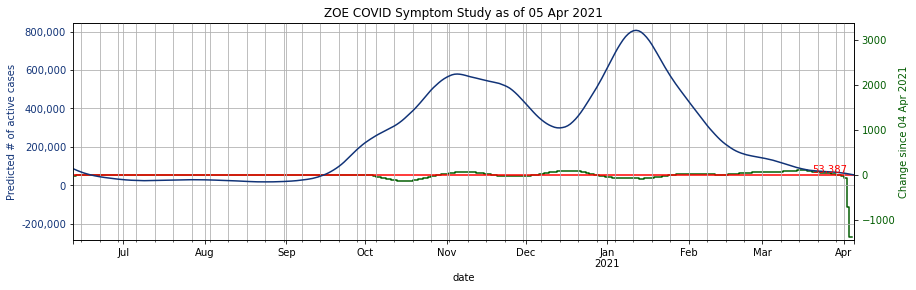

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

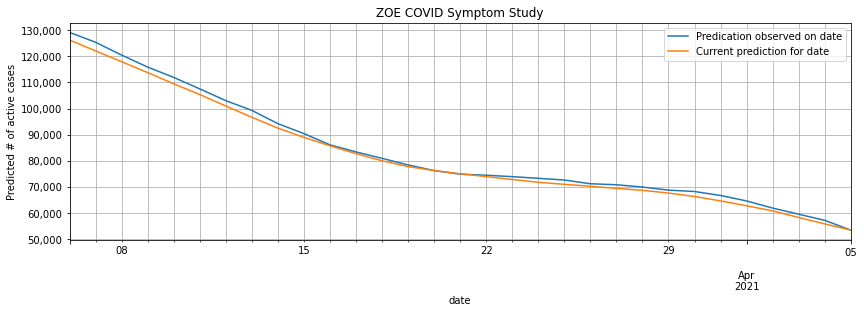

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-05_2021-04-05-17-00.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
323,North Lanarkshire,S12000044,1.325218
240,Wakefield,E08000036,0.473941
273,Trafford,E08000009,0.433362
358,Belfast,N09000003,0.411100
294,Walsall,E08000030,0.374151
317,Renfrewshire,S12000038,0.372447
146,Staffordshire Moorlands,E07000198,0.343274
376,South Lanarkshire,S12000029,0.321674
387,Powys,W06000023,0.319174
197,South Norfolk,E07000149,0.300527
